In [1]:
CUDA_INDEX = 1
NAME = 'Amazon'
CLASSES = 2

In [2]:
import sys
sys.path.insert(0, '../..')
sys.path.insert(0, '../../pyged/lib')

In [3]:
import os
import pickle
import random
import time

import IPython as ipy
import matplotlib.pyplot as plt
import numpy as np
import torch
torch.cuda.set_device(CUDA_INDEX)
torch.backends.cudnn.benchmark = True
import torch.optim
import torch_geometric as tg
import torch_geometric.data
from tqdm.auto import tqdm

from neuro import config, datasets, metrics, models, train, utils, viz
import pyged

from importlib import reload
reload(config)
reload(datasets)
reload(metrics)
reload(models)
reload(pyged)
reload(train)
reload(utils)
reload(viz)

<module 'neuro.viz' from '../../neuro/viz.py'>

In [5]:
train_set, train_meta = torch.load(f'/data/rishabh/neurosim/final/data/{NAME}/train.pt', map_location='cpu')

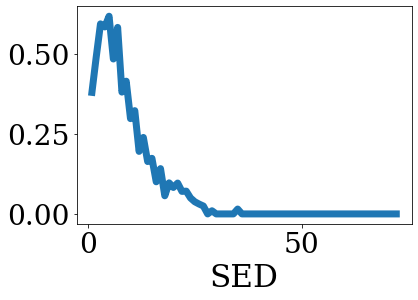

In [8]:
queries, targets, lb, ub = train_set
sed = (lb+ub)/2
# plt.figure(figsize=(12,4))
# plt.subplot(121)
# viz.plot_corr(sed, ub-lb, show_std=True)
# plt.xlabel('SED')
# plt.ylabel('UB-LB')
# plt.title('Range vs SED')
# plt.subplot(122)
plt.rcParams['font.family'] = 'serif'
plt.figure()
viz.plot_corr(sed, (ub-lb)/sed, show_std=False, linewidth=7)
# plt.rcParams.update({'mathtext.default':  'regular' })
plt.xlabel('SED', fontsize=31)
# plt.ylabel('$\dfrac{UB-LB}{(LB+UB)/2}$', fontsize=35)
# plt.title('Relative Range vs SED')
plt.tick_params(labelsize=28)
plt.savefig(f'../plots/Quality.{NAME}.eps', bbox_inches='tight')
plt.show()

In [13]:
print(f'mean relative error: {utils.nanmean((ub-lb)/((ub+lb)/2)).item():.3}')

mean relative error: 0.409


In [6]:
nodes = [h.num_nodes for h in train_set[1]]
edges = [h.num_edges for h in train_set[1]]
print(f'avg target nodes: {sum(nodes)/len(nodes):.3f}')
print(f'avg target edges: {sum(edges)/len(edges):.3f}')

avg target nodes: 42.591
avg target edges: 194.287


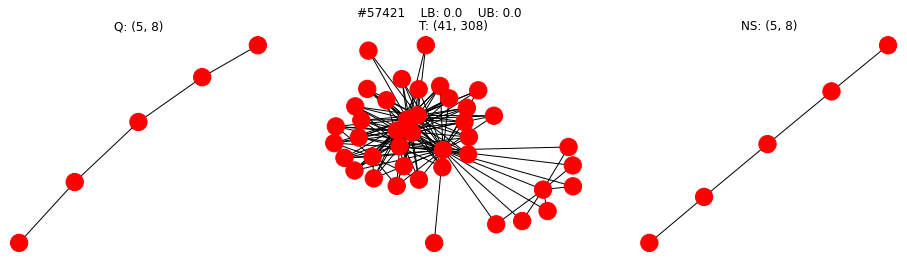

---

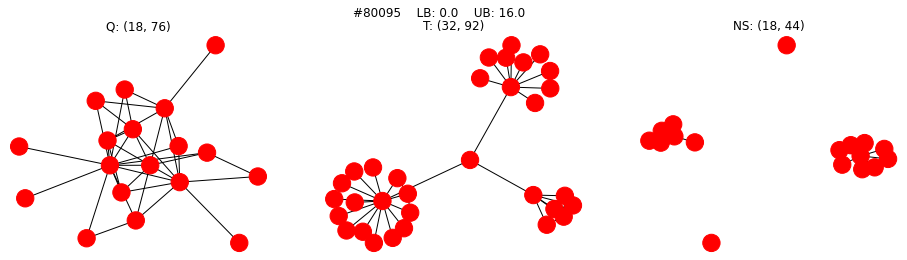

---

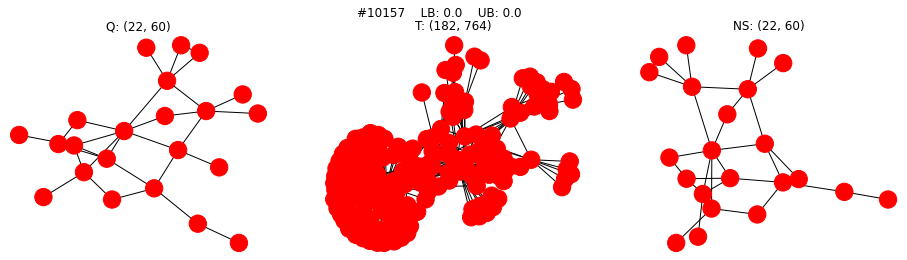

---

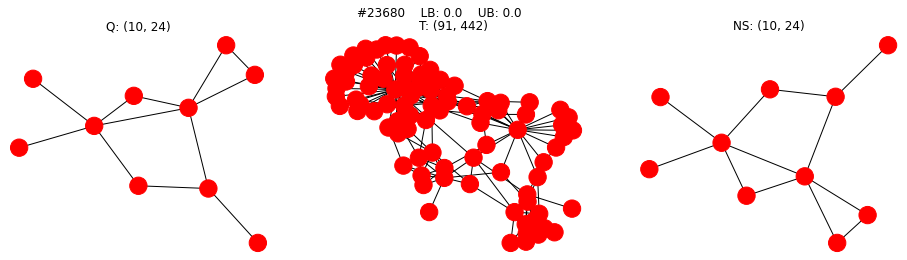

---

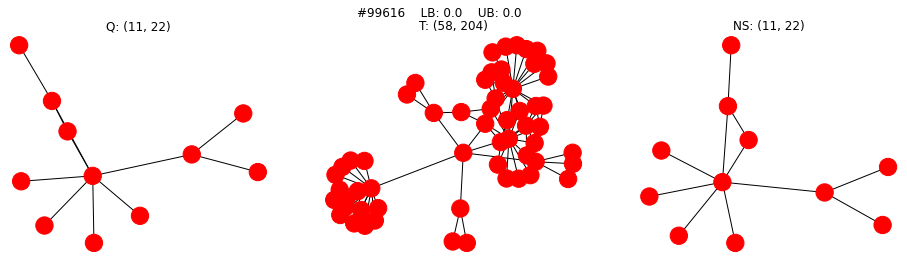

---

In [7]:
viz.plot_inner_dataset_plus(train_set, train_meta, n_items=5, random=True)

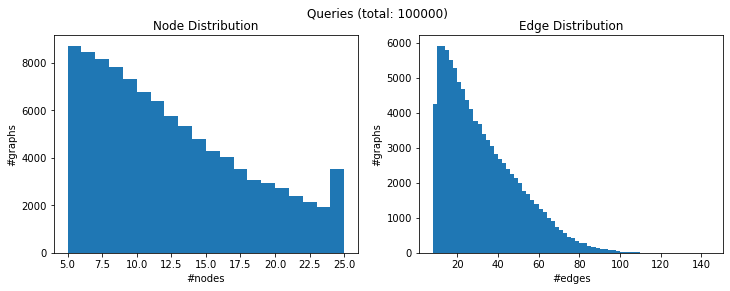

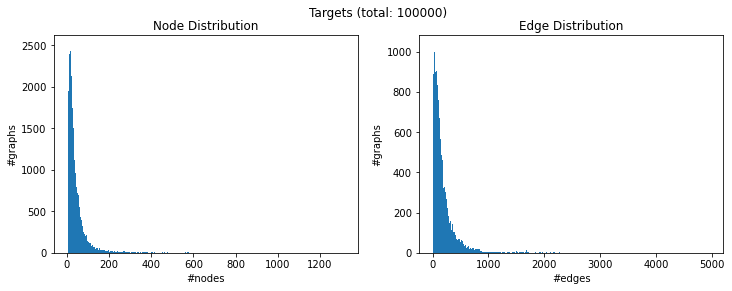

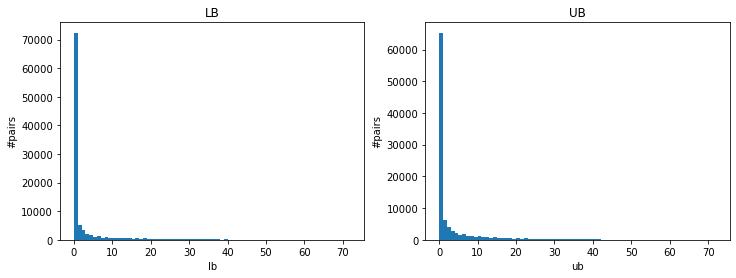

In [8]:
viz.plot_dataset_dist(train_set)

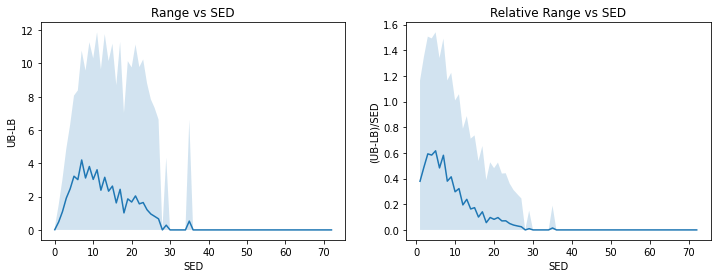

In [9]:
queries, targets, lb, ub = train_set
sed = (lb+ub)/2
plt.figure(figsize=(12,4))
plt.subplot(121)
viz.plot_corr(sed, ub-lb, show_std=True)
plt.xlabel('SED')
plt.ylabel('UB-LB')
plt.title('Range vs SED')
plt.subplot(122)
viz.plot_corr(sed, (ub-lb)/sed, show_std=True)
plt.xlabel('SED')
plt.ylabel('(UB-LB)/SED')
plt.title('Relative Range vs SED')
plt.show()

In [10]:
val_set, _ = torch.load(f'../data/{NAME}/val.pt', map_location='cpu')

In [11]:
model = models.NormSEDModel(8, CLASSES, 64, 64).to(config.device)

In [12]:
loader = tg.data.DataLoader(list(zip(*train_set)), batch_size=200, shuffle=True)
val_loader = tg.data.DataLoader(list(zip(*val_set)), batch_size=1000, shuffle=True)

In [13]:
dump_path = os.path.join(f'../runlogs/{NAME}', str(time.time()))
os.mkdir(dump_path)
train.train_full(model, loader, val_loader, lr=1e-3, weight_decay=1e-3, cycle_patience=5, step_size_up=2000, step_size_down=2000, dump_path=dump_path)

dump path: ../runlogs/Amazon/1628189994.2692797


([771086720.0,
  176084254720.0,
  3426673152.0,
  1560637056.0,
  2535763456.0,
  1367198080.0,
  347926429696.0,
  12229678080.0,
  174406336512.0,
  168188608512.0,
  157806016.0,
  5128807424.0,
  146375933952.0,
  12769189888.0,
  266279075840.0,
  820859776.0,
  124823461888.0,
  10358027264.0,
  16293382144.0,
  2440060416.0,
  13679204352.0,
  95238283264.0,
  2316419072.0,
  13798621184.0,
  2224508672.0,
  4032059392.0,
  100091952.0,
  1004546624.0,
  5244523520.0,
  5978982912.0,
  24024122.0,
  9581243392.0,
  883171456.0,
  30755538.0,
  7726649.0,
  321015584.0,
  832939.6875,
  37492961280.0,
  1325050880.0,
  29962770432.0,
  1044836800.0,
  114707424.0,
  77859976.0,
  261499280.0,
  74118928.0,
  1249660928.0,
  1976068352.0,
  489086976.0,
  9751828480.0,
  1054181120.0,
  400409632.0,
  91093992.0,
  277697248.0,
  4476619264.0,
  58949012.0,
  425518432.0,
  46488420.0,
  19461686.0,
  386978.75,
  1485953408.0,
  106909344.0,
  1158392320.0,
  142211936.0,
  9204